In [ ]:
!pip install scikit-learn matplotlib seaborn joblib

In [ ]:
#Importing necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import joblib

In [3]:
#Loading my indpendant variables and dependant variable of the breast cancer dataset

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


In [15]:
X.isna().sum()  # checked no missing values

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [4]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
RANDOM_STATE = 42  # for reproducibility

# splitting with 0.2 test set and startified for class sembalance
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE
)

In [8]:

print("Dataset shape", X.shape)
print("Class distribution", y.value_counts(normalize=True))

Dataset shape (569, 30)
Class distribution 1    0.627417
0    0.372583
Name: proportion, dtype: float64


In [10]:
print(data.target_names)   # ['malignant' 'benign']


['malignant' 'benign']


In [14]:
#0 =cancerous or malignant ,1=non cancerous or benign
print(set(data.target))

{np.int64(0), np.int64(1)}


In [16]:
# creating preprocessor

numeric_features = X.columns.tolist()  # converting all columns to list to fit in the pipeline object
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Nan values to be imputed with median
    ('scaler', StandardScaler())  # o mean and std 1
])

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features)
])


In [19]:
#Creating a Decision Tree pipeline
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

#Creating a Random Forest pipeline
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1)) #use all cores
])

In [20]:
#Fitting decision tree and Random forest on the training data set and seeing evaluation
#after predicting on y tet

dt_pipeline.fit(X_train, y_train)
print("Decision Tree Report:", classification_report(y_test, dt_pipeline.predict(X_test)))



Decision Tree Report:               precision    recall  f1-score   support

           0       0.85      0.93      0.89        42
           1       0.96      0.90      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



In [ ]:
#decision tree being a singular tree can overfit

# random forest can reduceoverfitting as multiple trees Ensemble
#also decorrelated due to max features  and bootstrap taken to build each tree

#Random forest gave a bettert result as checked in next cell

In [21]:
#Random forest

rf_pipeline.fit(X_train, y_train)
print("Random Forest Report:", classification_report(y_test, rf_pipeline.predict(X_test)))

Random Forest Report:               precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [22]:
# GridSearchCV for Decision Tree
dt_param_grid = {
    'clf__criterion': ['gini', 'entropy'],  #gini impurity or information gain for splitting criteria
    'clf__max_depth': [None, 5, 10, 20],# depth to control tree growth
    'clf__min_samples_split': [2, 4, 8], # min samples required to split a node
    'clf__min_samples_leaf': [1, 2, 4],# min samples to be in leaf node
}
dt_gs = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)# doing  5 fold cross validation to check overfitting
                                                                                   #scoring is f1 score
dt_gs.fit(X_train, y_train)
print("Best DT Params:", dt_gs.best_params_)
print("DT Report:", classification_report(y_test, dt_gs.best_estimator_.predict(X_test)))



Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best DT Params: {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 8}
DT Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88        42
           1       0.94      0.92      0.93        72

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



In [23]:
# RandomizedSearchCV for Random Forest  ,taking randomized seacrh as many hyperparametrs to try
from scipy.stats import randint
rf_param_distribution = {
    'clf__n_estimators': randint(100, 500),#number of trees to be built inbetween 100 and 500
    'clf__max_depth': [None] + list(range(5, 30, 5)),# maximum depth of trees in forest ;Start5 stop30 step5
                                               # also giving None to let tree grow until pure or min_sample rule reached
    'clf__min_samples_split': randint(2, 10), # number of samples required for a node to split in two child nodes
    'clf__min_samples_leaf': randint(1, 5), # min samples to be present in leaf node or the final stopping node
    'clf__max_features': ['sqrt', 'log2', None],  # max features or columns features taken to build a tree ,smaller can  reduce
                                                   #overfitting
}
rf_rs = RandomizedSearchCV(rf_pipeline, rf_param_dist, n_iter=30, cv=5, scoring='f1', n_jobs=-1, random_state=RANDOM_STATE, verbose=1)
rf_rs.fit(X_train, y_train)
print("Best RF Params:", rf_rs.best_params_)
print("RF Report:\n", classification_report(y_test, rf_rs.best_estimator_.predict(X_test)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best RF Params: {'clf__max_depth': 25, 'clf__max_features': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 6, 'clf__n_estimators': 317}
RF Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [44]:
#seeing predict probabilities for class 0 and 1
y_pred = rf_rs.best_estimator_.predict(X_test)

# Get prediction probabilities
y_proba = rf_rs.best_estimator_.predict_proba(X_test)

print("Predicted labels:", y_pred[:10])
print("Predicted probabilities:", y_proba[:10])

Predicted labels: [0 1 0 0 0 1 1 0 0 0]
Predicted probabilities: [[1.         0.        ]
 [0.         1.        ]
 [0.83076461 0.16923539]
 [0.74006707 0.25993293]
 [0.99369085 0.00630915]
 [0.         1.        ]
 [0.04520054 0.95479946]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]]


In [46]:
# creating a dataframe
import pandas as pd

# Geying predictions and probabilities
y_pred = rf_rs.best_estimator_.predict(X_test)
y_proba = rf_rs.best_estimator_.predict_proba(X_test)

# Create DataFrame
results_df = pd.DataFrame({
    "y_true": y_test,
    "y_pred": y_pred,
    "proba_class_0": y_proba[:, 0],  # Probability of class 0 (malignant)
    "proba_class_1": y_proba[:, 1]   # Probability of class 1 (benign)
})

# Showing first 10 rows
results_df.head(10)


,y_true,y_pred,proba_class_0,proba_class_1
256,0,0,1.000000,0.000000
428,1,1,0.000000,1.000000
501,0,0,0.830765,0.169235
363,1,0,0.740067,0.259933
564,0,0,0.993691,0.006309
464,1,1,0.000000,1.000000
358,1,1,0.045201,0.954799
343,0,0,1.000000,0.000000
516,0,0,1.000000,0.000000
567,0,0,1.000000,0.000000


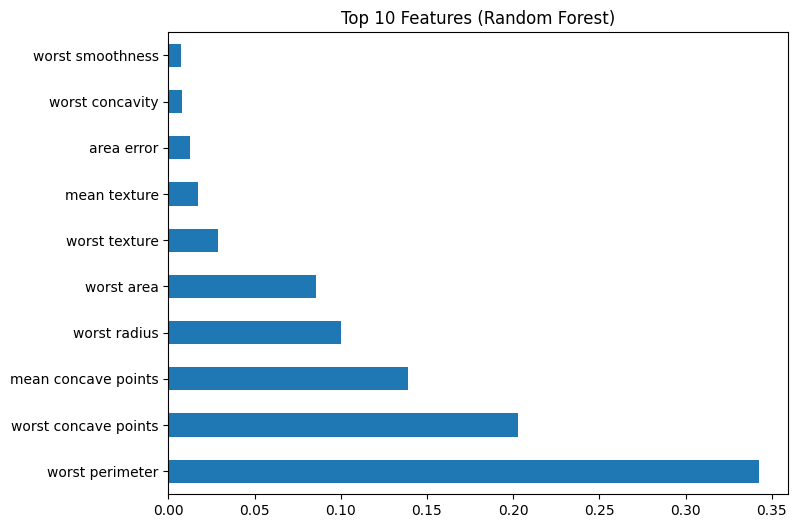

In [24]:
# seeing feature importances


best_rf = rf_rs.best_estimator_.named_steps['clf']
importances = pd.Series(best_rf.feature_importances_, index=numeric_features).sort_values(ascending=False)
importances.head(10).plot(kind='barh', figsize=(8,6))
plt.title("Top 10 Features (Random Forest)")
plt.show()

###  Note on Feature Importances vs Explainability

In Decision Trees and Random Forests, the attribute feature_importances  shows how much
each feature helps in **reducing impurity** (Gini impurity or Entropy) or, in other words,
how much it contributes to **increasing information gain** when making splits.  

- ✅ This gives a **global ranking** of the most influential features in the model.  
- ❌ However, it does **not** tell us the **direction** of the effect:  
  - e.g., does a larger "worst perimeter" push a sample toward *malignant* or toward *benign*?  

To understand **both magnitude and direction**, and to explain predictions **globally and locally**,  
we will use **SHAP (SHapley Additive exPlanations)** in the next stage.  

In [ ]:
# XAI SHAP

In [30]:
import shap

# Extracting the trained Random Forest from the pipeline
best_rf = rf_rs.best_estimator_.named_steps['clf']

# Transforming  test set using the preprocessor (scaler, imputer)
X_test_transformed = rf_rs.best_estimator_.named_steps['preprocessor'].transform(X_test)

# Creating  SHAP explainer for tree models
explainer = shap.TreeExplainer(best_rf)

# Computing  SHAP values for test set
shap_values = explainer(X_test_transformed)



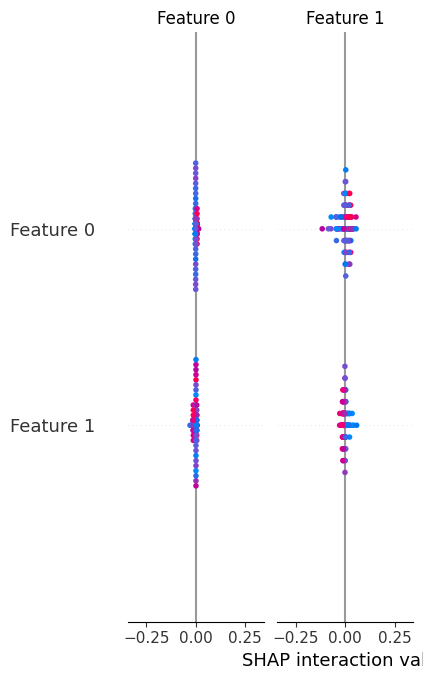

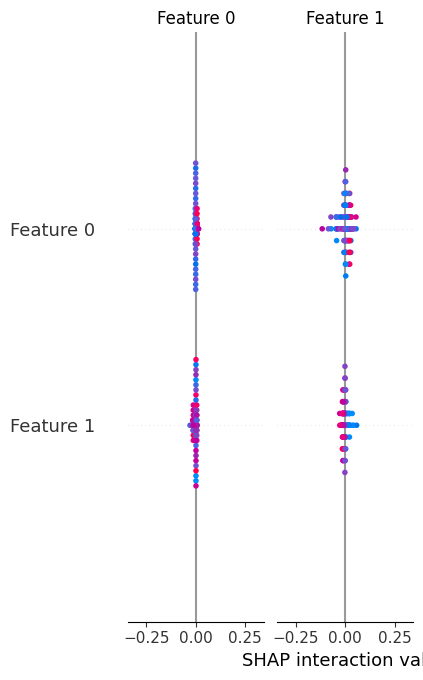

In [43]:
import shap
explainer = shap.TreeExplainer(best_rf)
shap_values = explainer.shap_values(X_test_transformed)
shap.summary_plot(shap_values, X_test_transformed, plot_type="bar")
shap.summary_plot(shap_values, X_test_transformed)

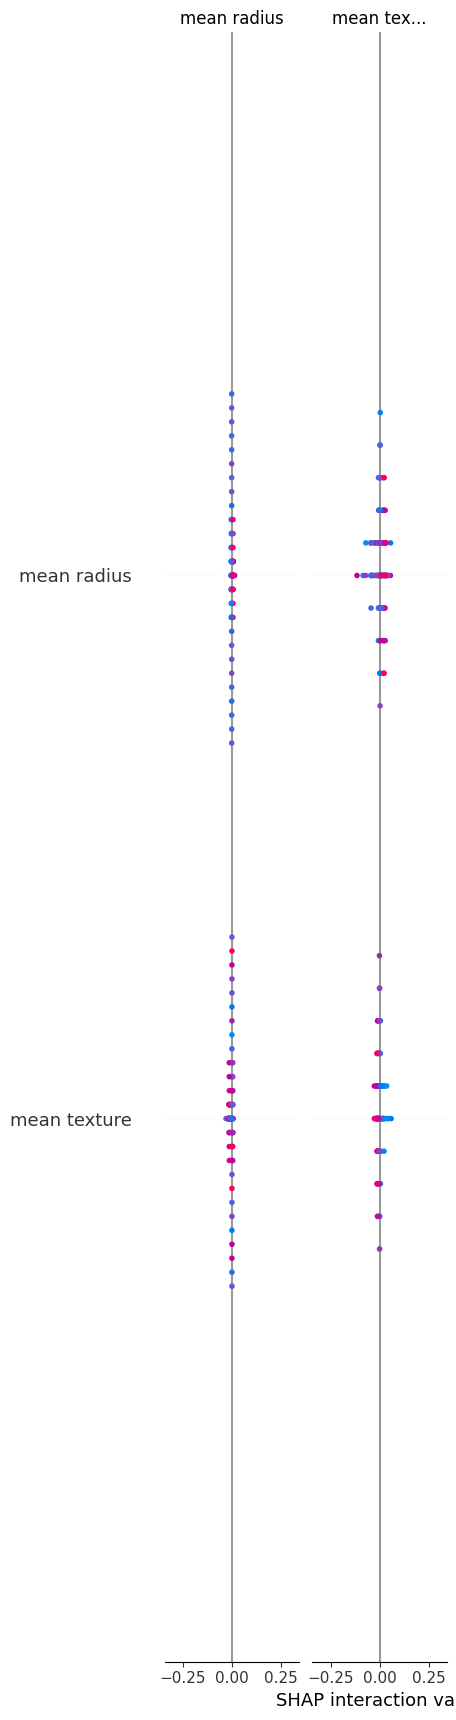

In [41]:
# Global importance ranking (bar plot)
shap.summary_plot(
    shap_values,
    X_test_transformed,
    feature_names=X.columns.tolist(),
    plot_type="bar",
    max_display=20
)